In [1]:
import keras
import tensorflow as tf
from keras import layers
from keras import callbacks
import matplotlib.pyplot as plt
from keras.src.legacy.preprocessing.image import ImageDataGenerator

In [2]:
# Specify GPU usage
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
input_size = 256
image_dimensions = (input_size, input_size)

# Normalize image color values
datagen = ImageDataGenerator(
    rescale = 1.0 / 255.0,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)

# Build training generator dataset
train_generator = datagen.flow_from_directory(
    '../data/train',
    target_size = image_dimensions,
    batch_size = 32,
    class_mode ='categorical',
    color_mode = 'rgb',
    shuffle=True
)

# Normalize image color values
test_datagen = ImageDataGenerator(rescale = 1.0 / 255.0)

# Build testing generator dataset
test_generator = test_datagen.flow_from_directory(
    '../data/test',
    target_size = image_dimensions,
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle = False
)

Found 4529 images belonging to 5 classes.
Found 1127 images belonging to 5 classes.


In [11]:
########### CODE PROVIDED BY PROFESSOR ###########
model = keras.Sequential([
    keras.Input(shape=(input_size, input_size, 3)),
    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(5, activation="softmax")  # 5 classes output
])

In [12]:
########### CODE PROVIDED BY PROFESSOR ###########
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 524288)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    67,108,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,202,885 (256.36 MB)

 Trainable params: 67,202,885 (256.36 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
########### CODE PROVIDED BY PROFESSOR ###########
model.compile(
	optimizer="adam",
    loss="categorical_crossentropy",
	metrics=["accuracy"]
)

In [14]:
# Setup callbacks
early_stopping = callbacks.EarlyStopping(monitor = "val_loss", patience = 5, restore_best_weights = True)
model_checkpoint = callbacks.ModelCheckpoint('best_model.h5', monitor = 'val_loss', save_best_only = True)

In [15]:
history = model.fit(
    train_generator,
    epochs = 30,
    callbacks = [early_stopping , model_checkpoint],
    validation_data = test_generator,
    verbose = 2
)

Epoch 1/30


142/142 - 47s - 329ms/step - accuracy: 0.3714 - loss: 2.3499 - val_accuracy: 0.4712 - val_loss: 1.3152
Epoch 2/30


142/142 - 45s - 320ms/step - accuracy: 0.4378 - loss: 1.4080 - val_accuracy: 0.4712 - val_loss: 1.2729
Epoch 3/30
142/142 - 45s - 314ms/step - accuracy: 0.4495 - loss: 1.3744 - val_accuracy: 0.4729 - val_loss: 1.2748
Epoch 4/30


142/142 - 46s - 323ms/step - accuracy: 0.4125 - loss: 1.5653 - val_accuracy: 0.5634 - val_loss: 1.2035
Epoch 5/30
142/142 - 46s - 326ms/step - accuracy: 0.4438 - loss: 1.5224 - val_accuracy: 0.5155 - val_loss: 1.4664
Epoch 6/30
142/142 - 46s - 325ms/step - accuracy: 0.3568 - loss: 1.8409 - val_accuracy: 0.4712 - val_loss: 1.4733
Epoch 7/30
142/142 - 45s - 316ms/step - accuracy: 0.4621 - loss: 1.4243 - val_accuracy: 0.4720 - val_loss: 1.3350
Epoch 8/30
142/142 - 44s - 312ms/step - accuracy: 0.4752 - loss: 1.3490 - val_accuracy: 0.4996 - val_loss: 1.2311
Epoch 9/30
142/142 - 44s - 310ms/step - accuracy: 0.4579 - loss: 1.3695 - val_accuracy: 0.5439 - val_loss: 1.2431


In [16]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=2)

print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

36/36 - 4s - 114ms/step - accuracy: 0.5634 - loss: 1.2035
Test loss: 1.20354163646698
Test accuracy: 0.5634427666664124


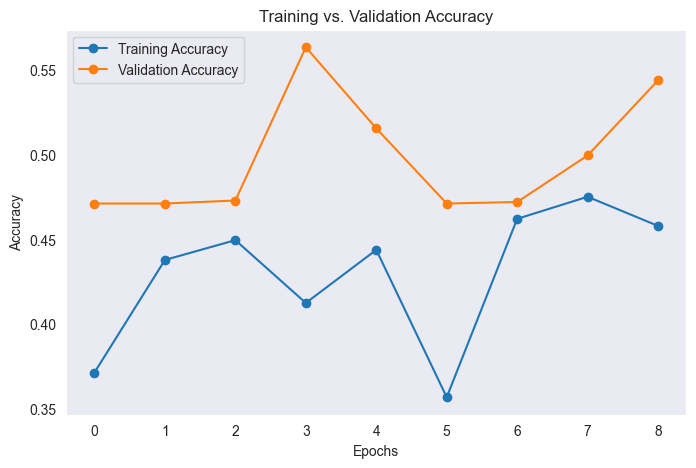

In [17]:
# Plot training vs validation accuracy
plt.figure(figsize = (8, 5))
plt.plot(history.history['accuracy'], label = 'Training Accuracy', marker = 'o')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy', marker = 'o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs. Validation Accuracy")
plt.legend()
plt.grid()
plt.show()